In [13]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Select predictions file

In [14]:
for ppath in os.listdir('./preds/'):
    if 'predictions' in ppath:
        print(ppath)

predictions_FRAME.npy
predictions_0.15s_missingvids_minorimbalance_5epochs_152927_03-05.npy
predictions_ominus1s_missingvids_minorimbalance_5epochs_184859_03-04.npy
predictions_small0.15s_missingvids_minorimbalance_5epochs_121526_03-09.npy
predictions_FRAME_all.npy
predictions_small1s_missingvids_minorimbalance_5epochs_120943_03-06.npy
predictions_s2_missingvids_minorimbalance_5epochs_181615_03-01.npy
predictions_o_missingvids_minorimbalance_5epochs_224638_02-20.npy
predictions_s0.333_missingvids_minorimbalance_5epochs_212905_03-03.npy
predictions_s1_missingvids_minorimbalance_5epochs_152550_02-27.npy
predictions_s0.5_missingvids_minorimbalance_5epochs_230857_03-02.npy


In [15]:
# change this to a path to .npy file
path = './preds/predictions_FRAME_all.npy'
preds = np.load(path)
preds, preds.shape

(array([[0.        , 0.32256564],
        [0.        , 0.35970542],
        [0.        , 0.38141841],
        [0.        , 0.35777062],
        [1.        , 0.40149063],
        [1.        , 0.25479633],
        [1.        , 0.31856978],
        [1.        , 0.26421106],
        [1.        , 0.28782445],
        [1.        , 0.40854907],
        [0.        , 0.29820609],
        [0.        , 0.35251909],
        [1.        , 0.37536678],
        [0.        , 0.34866911],
        [1.        , 0.3369914 ],
        [0.        , 0.25738129],
        [1.        , 0.47921309],
        [1.        , 0.36888978],
        [0.        , 0.39566562],
        [0.        , 0.34983805],
        [1.        , 0.38266742],
        [1.        , 0.26697022],
        [0.        , 0.41517633],
        [0.        , 0.37550893],
        [1.        , 0.22488536],
        [1.        , 0.29036734],
        [1.        , 0.26443052],
        [0.        , 0.23829697],
        [0.        , 0.3719044 ],
        [0.   

In [16]:
probs = np.array([float(p) for p in preds[:, 1]])
y = np.array([float(l) for l in preds[:,0]])

fpr, tpr, thresh = roc_curve(y, probs, pos_label=1)
random_probs = [0 for i in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)
auc_score = roc_auc_score(y, probs)
print('AUC = ', auc_score)

AUC =  0.46285714285714286


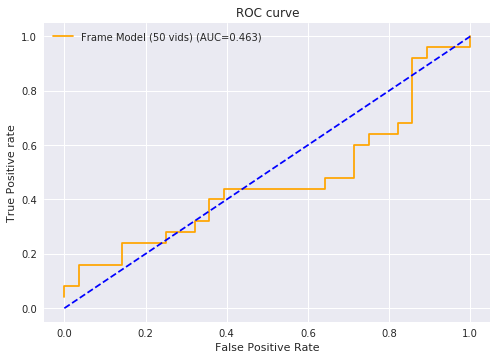

In [17]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr, tpr, linestyle='-',color='orange', label='Frame Model (50 vids) (AUC='+str(round(auc_score,3))+')')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show();

In [7]:
optimal_thresh = thresh[np.argmax(tpr-fpr)]
print('Optimal Threshold = ',round(optimal_thresh*100,2),'%')
optimal_thresh

Optimal Threshold =  57.72 %


0.5772206783294678

In [8]:
preds = np.array([int(float(p)) for p in (probs >= optimal_thresh)])

In [9]:
conf_matrix = confusion_matrix(y, preds)
print('Confusion Matrix')
conf_matrix

Confusion Matrix


array([[15,  9],
       [ 6, 11]])

In [10]:
acc = accuracy_score(y, preds)
print('Accuracy = ', acc)

Accuracy =  0.6341463414634146


In [11]:
tn, fp, fn, tp = conf_matrix.ravel()
tn, fp, fn, tp

(15, 9, 6, 11)

In [12]:
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
ppv = tp/(tp+fp)
npv = tn/(fn+tn)

print('Sensitivity = ', sensitivity)
print('Specificity = ', specificity)
print('PPV = ', ppv)
print('NPV = ', npv)

Sensitivity =  0.6470588235294118
Specificity =  0.625
PPV =  0.55
NPV =  0.7142857142857143


In [46]:
sens = []
spec = []
ppvs = []
npvs = []
accs = []
ths = []
intersect_thresh = 0
for t,f,th in zip(tpr,fpr,thresh[1:]):
    try:
        preds_i = np.array([int(float(p)) for p in (probs >= th)])
        conf_matrix_i = confusion_matrix(y, preds_i)
        acc_i = accuracy_score(y, preds_i)
        tn, fp, fn, tp = conf_matrix_i.ravel()
        sensitivity = tp/(tp+fn)
        specificity = tn/(tn+fp)
        ppv = tp/(tp+fp)
        npv = tn/(fn+tn)
        if ppv == npv or npv == sensitivity or sensitivity==specificity or specificity==ppv: intersect_thresh=th
        sens.append(sensitivity)
        spec.append(specificity)
        ppvs.append(ppv)
        npvs.append(npv)
        accs.append(acc_i)
        ths.append(th)
    except:
        continue

<ipython-input-46-40d6815467e2>:17: RuntimeWarning: invalid value encountered in longlong_scalars
  npv = tn/(fn+tn)


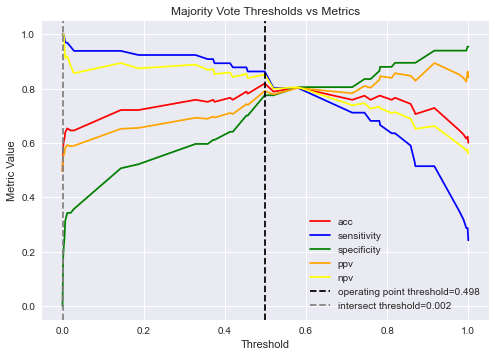

In [47]:
plt.plot(ths,accs, color='red', label='acc')
plt.plot(ths,sens, color='blue', label='sensitivity')
plt.plot(ths,spec, color='green', label='specificity')
plt.plot(ths,ppvs, color='orange', label='ppv')
plt.plot(ths,npvs, color='yellow', label='npv')
plt.axvline(x=optimal_thresh, label='operating point threshold='+str(round(optimal_thresh,3)), color='black', linestyle='--')
plt.axvline(x=intersect_thresh, label='intersect threshold='+str(round(intersect_thresh,3)), color='gray', linestyle='--')
plt.legend(loc='lower right')
plt.title('Majority Vote Thresholds vs Metrics')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.show()